In [56]:
import pandas as pd
import numpy  as np
from sklearn                import utils
from sklearn                import preprocessing
from sklearn.pipeline       import Pipeline
from sklearn.linear_model   import LinearRegression
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics        import mean_squared_error
from sklearn.tree           import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing  import MinMaxScaler
from sklearn.model_selection import GridSearchCV
 
import matplotlib.pyplot as plt

In [21]:
def plot_real_predicted(Y):
    x = [i for i in range(150)]

    plt.rcParams["figure.figsize"] = (15,10)
    plt.plot(x, Y_test[:150])
    plt.plot(x, Y[:150])
    plt.show()

### Extraccion

In [3]:
df_trai = pd.read_csv('../instrucciones/datosEntrenamiento.csv', names=['A', 'B', 'C', 'D', 'val'])
df_test = pd.read_csv('../instrucciones/datosPrueba.csv',        names=['A', 'B', 'C', 'D', 'val'])
df_vali = pd.read_csv('../instrucciones/datosValidacion.csv',    names=['A', 'B', 'C', 'D'])

### Exploracion

In [69]:
df_trai.corr()

,A,B,C,D,val
A,1.000000,0.843183,-0.503403,-0.543673,-0.948731
B,0.843183,1.000000,-0.410853,-0.309859,-0.869185
C,-0.503403,-0.410853,1.000000,0.096809,0.517436
D,-0.543673,-0.309859,0.096809,1.000000,0.389565
val,-0.948731,-0.869185,0.517436,0.389565,1.000000


In [66]:
df_trai.isnull().sum()

A      0
B      0
C      0
D      0
val    0
dtype: int64

In [27]:
df_trai.dtypes

A      float64
B      float64
C      float64
D      float64
val    float64
dtype: object

In [53]:
X_trai = df_trai.loc[:, ['A', 'B', 'C', 'D']].values
Y_trai = df_trai.loc[:, 'val'].values

In [54]:
X_test = df_test.loc[:, ['A', 'B', 'C', 'D']].values
Y_test = df_test.loc[:, 'val'].values

In [55]:
X_vali = df_test.loc[:, ['A', 'B', 'C', 'D']].values

### Preprocesamiento, entrenamiento y prediccion (Regresion Lineal)

In [47]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
clf = LinearRegression()

pipe = Pipeline([
    ('scaler', scaler),
    ('regressor', clf)
])

pipe.fit(X_trai, Y_trai)

Y_pred = pipe.predict(X_test)

mean_squared_error(Y_pred, Y_test)

23.12186360660134

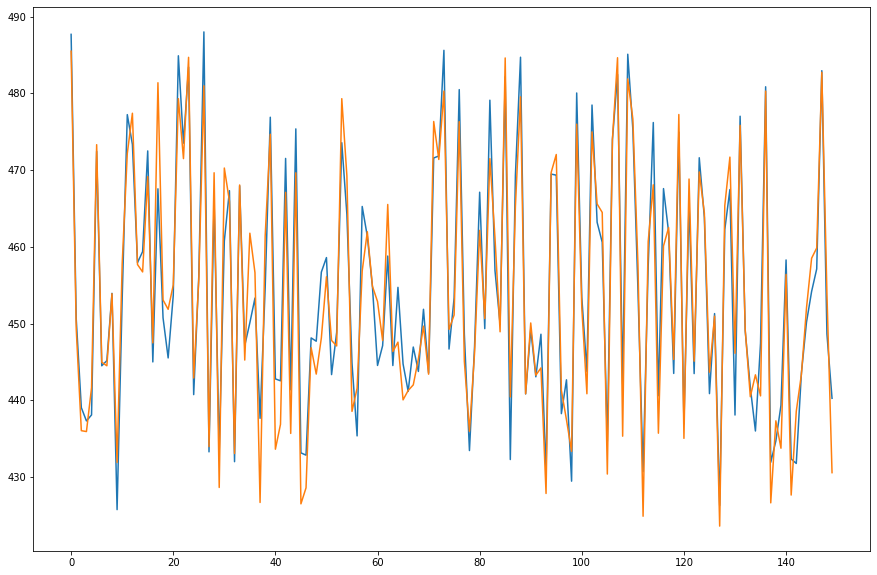

In [48]:
plot_real_predicted(Y_pred)

### Preprocesamiento, entrenamiento y prediccion (Regresion Arbol de Decision)

In [49]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
clf = DecisionTreeRegressor(random_state=0)

pipe = Pipeline([
    ('scaler', scaler),
    ('regressor', clf)
])

pipe.fit(X_trai, Y_trai)
Y_pred = pipe.predict(X_test)

mean_squared_error(Y_pred, Y_test)

32.94910585161964

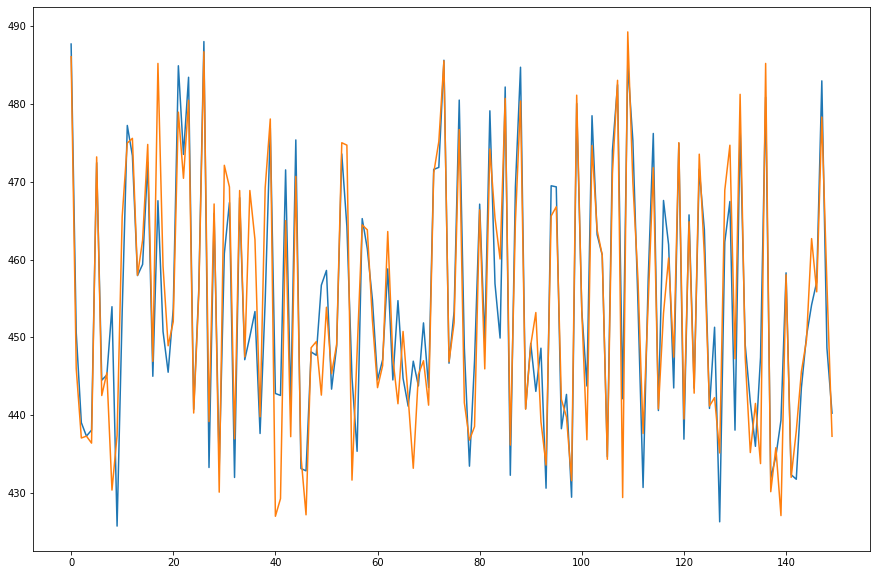

In [50]:
plot_real_predicted(Y_pred)

### Preprocesamiento, entrenamiento y prediccion (Regresion MLP Network)

In [70]:
scaler = StandardScaler()
clf = MLPRegressor()

pipe = Pipeline([
    ('scaler', scaler),
    ('regressor', clf)
])

param_grid = {
    'regressor__hidden_layer_sizes': [(16,8,16), (32, 16, 32)],
    'regressor__activation': ['logistic', 'relu'],
    'regressor__solver': ['adam'],
    'regressor__max_iter':[500, 750, 1000]
}

gs = GridSearchCV(pipe, param_grid, cv=5)
gs.fit(X_trai, Y_trai)

/home/pedro/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedro/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedro/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedro/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.ma

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regressor', MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learnin...=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'regressor__hidden_layer_sizes': [(16, 8, 16), (32, 16, 32)], 'regressor__activation': ['logistic', 'relu'], 'regressor__solver': ['adam'], 'regressor__max_iter': [500, 750, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [71]:
model = gs.best_estimator_

Y_pred = model.predict(X_test)

mean_squared_error(Y_pred, Y_test)

17.485303141312055

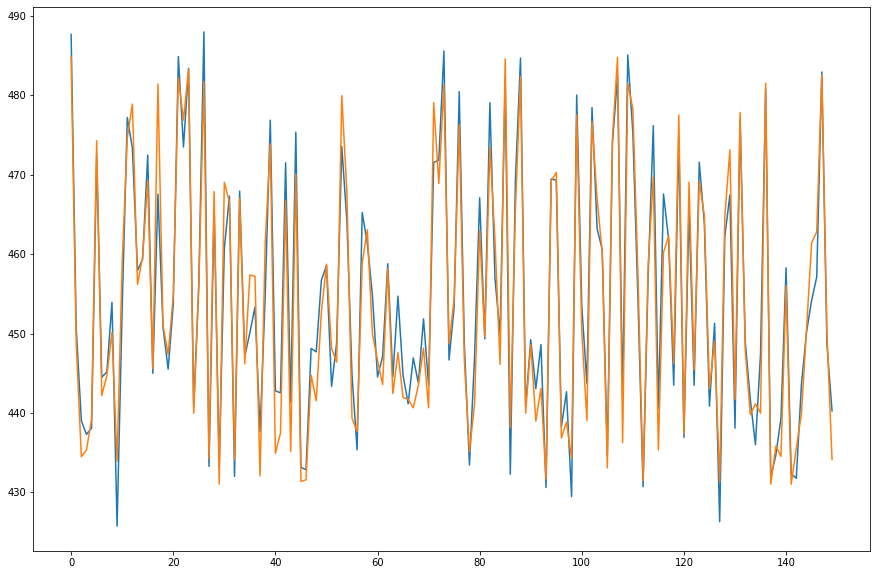

In [72]:
plot_real_predicted(Y_pred)